<a href="https://colab.research.google.com/github/komazawa-deep-learning/komazawa-deep-learning.github.io/blob/master/2022notebooks/2022_1024CNN_layer_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 畳み込みニューラルネットワークの事前訓練済モデルの中間表現を可視化する

- filename: `2022_1024CNN_layer_visualizaton.ipynb`
- author: 浅川伸一
- License: MIT
- date: 2022_1024



In [ ]:
%config InlineBackend.figure_format = 'retina'
# try:
#     import bit
# except ImportError:
#     !pip install ipynbname --upgrade > /dev/null 2>&1
#     !git clone https://github.com/ShinAsakawa/bit.git
#     import bit

# isColab = bit.isColab
# HOME = bit.HOME

In [ ]:
import torch
import torchvision
from torchvision import models, transforms
from termcolor import colored

from IPython.display import clear_output

# torchviz のインストール
try:
    import torchviz
except ImportError:
    !pip install torchviz
    import torchviz

# torchsummary のインストール
try:
    import torchsummary
except ImportError:
    !pip install torchsummary
    import torchsummary

try:
    import japanize_matplotlib
except ImportError:
    !pip install japanize_matplotlib
    import japanize_matplotlib

clear_output()

In [ ]:
# 各モデルを定義し，訓練済み結合係数をダウンロード
DNNs = {}
DNNs['resnet18'] = models.resnet18(weights='DEFAULT', progress=True)
DNNs['alexnet'] = models.alexnet(weights='DEFAULT', progress=True)
DNNs['vgg16'] = models.vgg16(weights='DEFAULT', progress=True)
DNNs['squeezenet']= models.squeezenet1_0(weights='DEFAULT', progress=True)
DNNs['densenet'] = models.densenet161(weights='DEFAULT', progress=True)
DNNs['inception'] = models.inception_v3(weights='DEFAULT', progress=True)
DNNs['googlenet'] = models.googlenet(weights='DEFAULT', progress=True)
DNNs['shufflenet'] = models.shufflenet_v2_x1_0(weights='DEFAULT', progress=True)
DNNs['mobilenet'] = models.mobilenet_v2(weights='DEFAULT', progress=True)
# DNNs['resnext50_32x4d'] = models.resnext50_32x4d(weights='DEFAULT', progress=True)
# DNNs['wide_resnet50_2'] = models.wide_resnet50_2(weights='DEFAULT', progress=True)
#DNNs['mnasnet'] = models.mnasnet1_0(weights='DEFAULT', progress=True)

# 上の中から試したいモデルを選んでください。最後のモデルが有効になります。
net = DNNs['resnet18']
# net = DNNs['alexnet']
# net = DNNs['squeezenet']
# net = DNNs['googlenet']
#net = DNNs['shufflenet']
# net = DNNs['mobilenet']
#net = DNNs['vgg16']
#net = DNNs['inception']
clear_output()

In [ ]:
import torchsummary
torchsummary.summary(net,input_size=(3,224,224))

In [ ]:
from torchviz import make_dot
x = torch.rand([1,3,224,224])
y = net.forward(x)
make_dot(y.mean(), params=dict(net.named_parameters()))

In [ ]:
for module_name in net.named_modules():
    if not '.' in module_name[0] and '' != module_name[0]:
        print(f'モジュール名: {module_name[0]}')

In [ ]:
class SaveOutput:
    def __init__(self):
        self.outputs = []

    def __call__(self, module, module_in, module_out):
        self.outputs.append(module_out)

    def clear(self):
        self.outputs = []

saved_output = SaveOutput()
hook_handles = []

# hooked_modules の内容を上で表示されたモジュールの中から選ぶ必要があります
hooked_modules = ['conv1', 'relu', 'layer1', 'layer2', 'layer3', 'layer4', 'avgpool']
#hooked_modules = ['features', 'avgpool']
#hooked_modules = ['maxpool2', 'maxpool3', 'maxpool4', 'avgpool']
#hooked_modules = ['features.2', 'features.8', 'features.18']
#hookd_modules = ['conv1', 'maxpool', 'stage2', 'stage3', 'stage4', 'conv5']
#hookd_modules = ['conv1', 'conv5']
for _module in net.named_modules():
    if _module[0] in hooked_modules:
        print(f'{_module[0]} hooked {type(_module[1])}')
        handle = _module[1].register_forward_hook(saved_output)
        hook_handles.append(handle)

saved_output.clear()

In [ ]:
# サンプル画像を持ってくる
!wget -O cat.jpg https://www.cats.org.uk/media/6189/manja-vitolic-gkxkby-c-dk-unsplash-web.jpg
#!wget -O cat.jpg https://assets.st-note.com/production/uploads/images/48243906/rectangle_large_type_2_b5262e2985eeeeb97650643b56181608.png
#!wget -O cat.jpg "https://www.aeonpet.com/assets/ap_special_detail/ap_special_detail-img-569.jpg"

saved_output.clear()
#clear_output()

In [ ]:
# image = Image.open(img_fname)
# print(dir(image))
# print(image.size)

['_Image__transformer', '__array_interface__', '__class__', '__copy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_category', '_close_exclusive_fp_after_loading', '_copy', '_crop', '_dump', '_ensure_mutable', '_exclusive_fp', '_exif', '_expand', '_get_safe_box', '_getexif', '_getmp', '_getxmp', '_min_frame', '_new', '_open', '_reload_exif', '_repr_png_', '_repr_pretty_', '_seek_check', '_size', 'alpha_composite', 'app', 'applist', 'apply_transparency', 'bits', 'close', 'convert', 'copy', 'crop', 'custom_mimetype', 'decoderconfig', 'decodermaxblock', 'draft', 'effect_spread', 'entropy', 'filename', 'filter', 'format', 'format_descr

In [ ]:
from PIL import Image
from torchvision import transforms as T
import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'
img_fname = 'cat.jpg'
image = Image.open(img_fname).convert('RGB')
transform = T.Compose([T.Resize((224, 224)), T.ToTensor()])
X = transform(image).unsqueeze(dim=0).to(device)

net.eval()
out = net(X)
len(saved_output.outputs)

plt.figure(figsize=(6,4))
plt.axis(False)
plt.imshow(image);

In [ ]:
# モジュールの表示
plt.figure(figsize=(18,4))
for i in range(len(saved_output.outputs)):
    plt.subplot(1,len(saved_output.outputs),i+1)
    #plt.gca().set_title(f'{hooked_modules[i]}')
    print(f'{hooked_modules[i]}')
    plt.imshow(saved_output.outputs[i].detach().numpy().mean(axis=1)[0], cmap='gray')

plt.show()

In [ ]:
from google.colab import files
_ = files.upload()

In [ ]:
img_fname = '2019Wolfe_preattentive_feature_fig4.jpg'
image = Image.open(img_fname)
transform = T.Compose([T.Resize((224, 224)), T.ToTensor()])
X = transform(image).unsqueeze(dim=0).to(device)

saved_output.clear()
net.eval()
out = net(X)
len(saved_output.outputs)

7

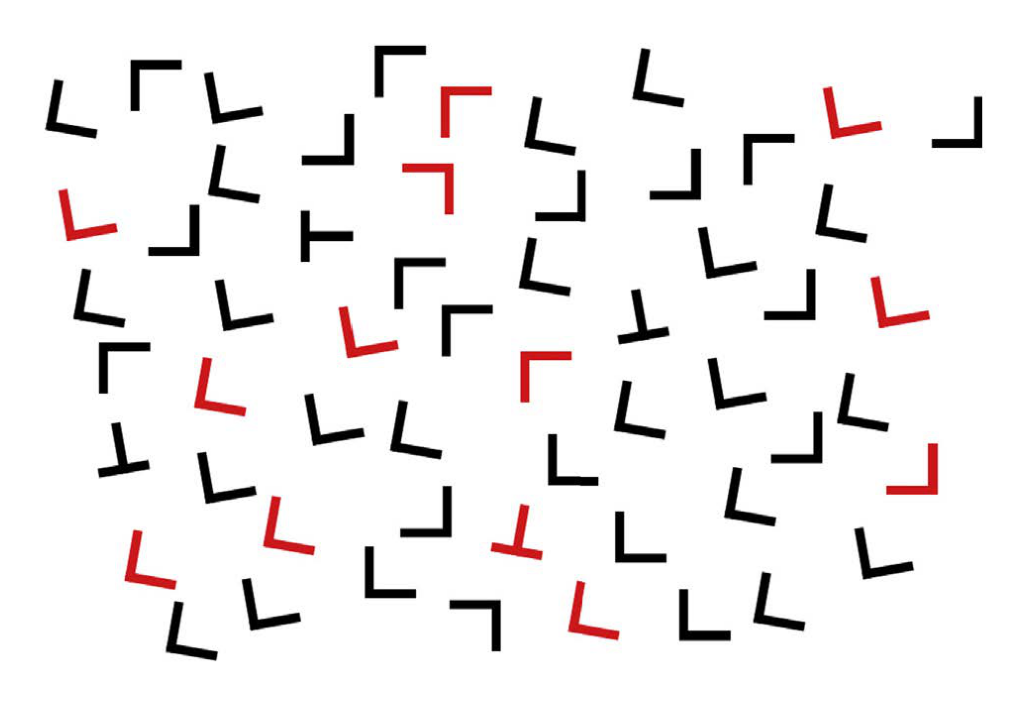

In [ ]:
plt.axis(False)
plt.imshow(image)

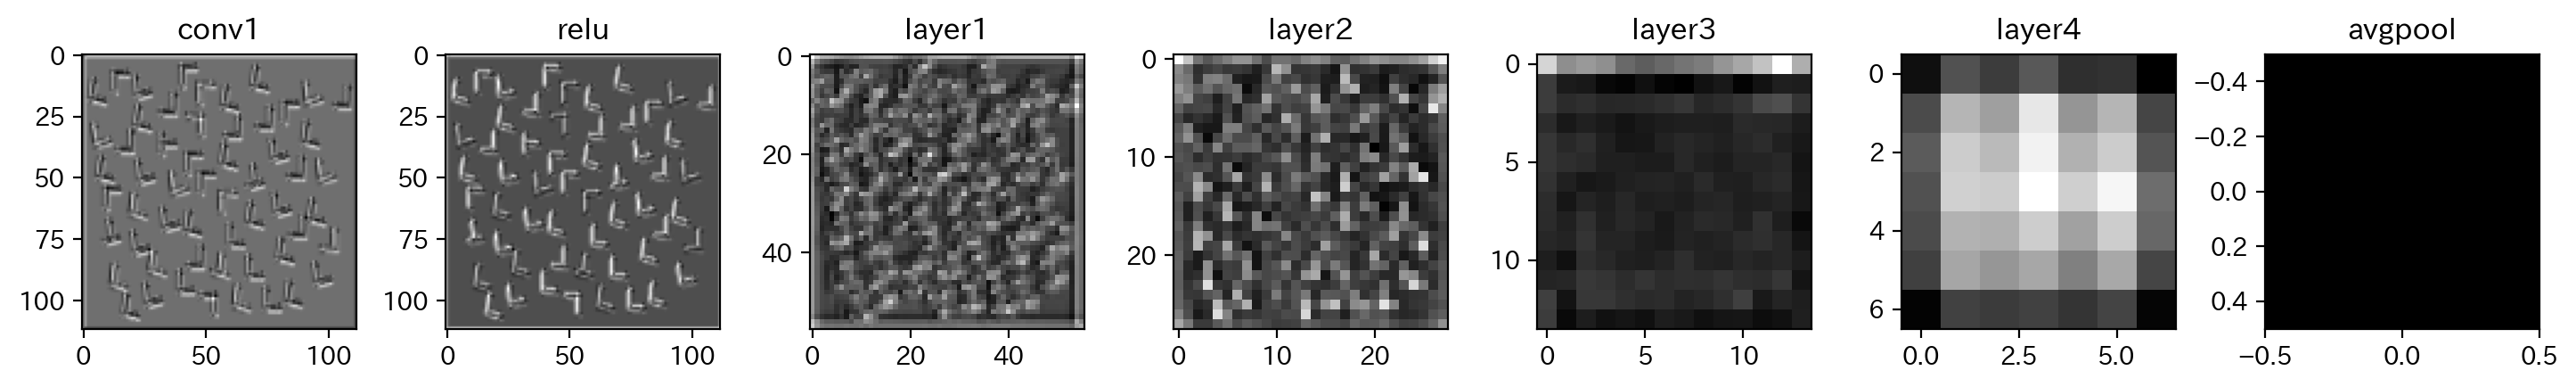

In [ ]:
plt.figure(figsize=(18,2))
for i in range(len(saved_output.outputs)):
    plt.subplot(1,len(saved_output.outputs),i+1)
    plt.gca().set_title(f'{hooked_modules[i]}')
    plt.imshow(saved_output.outputs[i].detach().numpy().mean(axis=1)[0], cmap='gray')

plt.show()